<a href="https://colab.research.google.com/github/anonimo-SBBD/SBBD/blob/main/EDA_SIM_SINAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# Extroratory Data Analysis

## SIM

Data dictionary:

- `DTOBITO`: Data do óbito, no formato ddmmaaaa;

- `SEXO`: Sexo, conforme a tabela: 0: Ignorado / 1: Masculino / 2: Feminino;

- `RACACOR`: Raça/Cor: 1: Branca / 2: Preta / 3: Amarela / 4: Parda / 5: Indígena;

- `ESTCIV`: Estado civil, conforme a tabela: 1: Solteiro / 2: Casado / 3: Viúvo / 4: Separado judicialmente / 5: União consensual (versões anteriores) / 9: Ignorado;

- `ESC`: Escolaridade, Anos de estudo concluídos: 1: Nenhuma / 2: 1 a 3 anos / 3: 4 a 7 anos / 4: 8 a 11 anos / 5: 12 e mais / 9: Ignorado;

- `OCUP`: Ocupação, conforme a Classificação Brasileira deOcupações (CBO-2002);

- `CODMUNRES`: Município de residência do falecido, conforme códigos IBGE;

- `CODMUNOCOR`: Município de ocorrência do óbito, conforme códigos IBGE;

- `LOCOCOR`: Local de ocorrência do óbito, conforme a tabela: 9: Ignorado / 1: Hospital / 2: Outro estab saúde / 3: Domicílio / 4: Via Pública / 5: Outros;

- `CAUSABAS`: Causa básica, conforme a Classificação Internacional de Doença (CID), 10a. Revisão;

- `ESC2010`: Escolaridade 2010. Valores: 0: Sem escolaridade / 1: Fundamental I (1a a 4a série) / 2: Fundamental II (5a a 8a série) / 3: Médio(antigo 2o Grau) / 4: Superior incompleto / 5: Superior completo / 9: Ignorado

In [ ]:
sul = pd.read_csv('SUL_SIM_limpo.csv')
sul

,IDADE,SEXO,RACACOR,ESTCIV,ESC,CODMUNRES,LOCOCOR,CAUSABAS,MONTH,DAY,YEAR,WEEK_DAY,SEASON,WEEKEND,Idade
0,26.0,1,1.0,1.0,5.0,410040,3,X700,1.0,12.0,2009.0,Monday,summer,0,1
1,27.0,1,1.0,1.0,4.0,410040,3,X700,5.0,19.0,2009.0,Tuesday,autumn,0,1
2,14.0,2,1.0,1.0,4.0,410040,1,X689,8.0,20.0,2009.0,Thursday,winter,0,0
3,27.0,1,1.0,1.0,3.0,410040,1,X699,3.0,7.0,2009.0,Saturday,summer,1,1
4,43.0,1,1.0,1.0,3.0,410040,5,X709,6.0,17.0,2009.0,Wednesday,autumn,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29903,56.0,1,1.0,1.0,0.0,432230,3,X700,12.0,30.0,2020.0,Wednesday,summer,0,4
29904,58.0,2,1.0,2.0,0.0,432090,3,X700,12.0,30.0,2020.0,Wednesday,summer,0,4
29905,44.0,1,1.0,1.0,0.0,430430,3,X700,12.0,31.0,2020.0,Thursday,summer,0,3
29906,46.0,1,2.0,2.0,3.0,431490,5,X709,12.0,31.0,2020.0,Thursday,summer,0,3


In [ ]:
sul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29908 entries, 0 to 29907
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IDADE      29908 non-null  float64
 1   SEXO       29908 non-null  int64  
 2   RACACOR    29908 non-null  float64
 3   ESTCIV     29908 non-null  float64
 4   ESC        29908 non-null  float64
 5   CODMUNRES  29908 non-null  int64  
 6   LOCOCOR    29908 non-null  int64  
 7   CAUSABAS   29908 non-null  object 
 8   MONTH      29908 non-null  float64
 9   DAY        29908 non-null  float64
 10  YEAR       29908 non-null  float64
 11  WEEK_DAY   29908 non-null  object 
 12  SEASON     29908 non-null  object 
 13  WEEKEND    29908 non-null  int64  
 14  Idade      29908 non-null  int64  
dtypes: float64(7), int64(5), object(3)
memory usage: 3.4+ MB


We created a column with the states acronym to facilitate the visualization.

First we wanted to understand how the was the evolution of the rate of suicide between the different states.

In [ ]:
sul['UF'] = pd.cut(sul['CODMUNRES'], labels= ['PR', 'SC', 'RS'], bins= [410000, 420000, 430000, 440000])
sul

,IDADE,SEXO,RACACOR,ESTCIV,ESC,CODMUNRES,LOCOCOR,CAUSABAS,MONTH,DAY,YEAR,WEEK_DAY,SEASON,WEEKEND,Idade,UF
0,26.0,1,1.0,1.0,5.0,410040,3,X700,1.0,12.0,2009.0,Monday,summer,0,1,PR
1,27.0,1,1.0,1.0,4.0,410040,3,X700,5.0,19.0,2009.0,Tuesday,autumn,0,1,PR
2,14.0,2,1.0,1.0,4.0,410040,1,X689,8.0,20.0,2009.0,Thursday,winter,0,0,PR
3,27.0,1,1.0,1.0,3.0,410040,1,X699,3.0,7.0,2009.0,Saturday,summer,1,1,PR
4,43.0,1,1.0,1.0,3.0,410040,5,X709,6.0,17.0,2009.0,Wednesday,autumn,0,3,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29903,56.0,1,1.0,1.0,0.0,432230,3,X700,12.0,30.0,2020.0,Wednesday,summer,0,4,RS
29904,58.0,2,1.0,2.0,0.0,432090,3,X700,12.0,30.0,2020.0,Wednesday,summer,0,4,RS
29905,44.0,1,1.0,1.0,0.0,430430,3,X700,12.0,31.0,2020.0,Thursday,summer,0,3,RS
29906,46.0,1,2.0,2.0,3.0,431490,5,X709,12.0,31.0,2020.0,Thursday,summer,0,3,RS


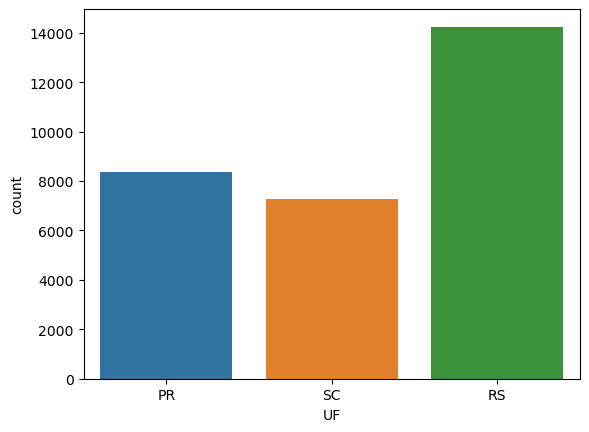

In [ ]:
sns.countplot(data= sul, x= 'UF');

In [ ]:
rs = len(sul[sul['UF'] == 'RS'])
pr = len(sul[sul['UF'] == 'PR'])
sc = len(sul[sul['UF'] == 'SC'])

# estimated population
PR = 11600000
SC = 7300000
RS = 11500000

anospr = pr/12
anossc = sc/12
anosrs = rs/12
taxapr = anospr/PR*100000
taxasc = anossc/SC*100000
taxars = anosrs/RS*100000

The rate for the different states are represent by deaths per 100 000 inhabitants.

In [ ]:
dict = {'UF':['PR', 'SC', 'RS'], 'Rate':[taxapr, taxasc, taxars]}
uf = pd.DataFrame(dict)
uf

,UF,Rate
0,PR,6.020115
1,SC,8.310502
2,RS,10.321739


We also wanted to see the growth in deaths from the first to last year analyzed.

Although RS had the least growth, ir continued to have the highest rate.

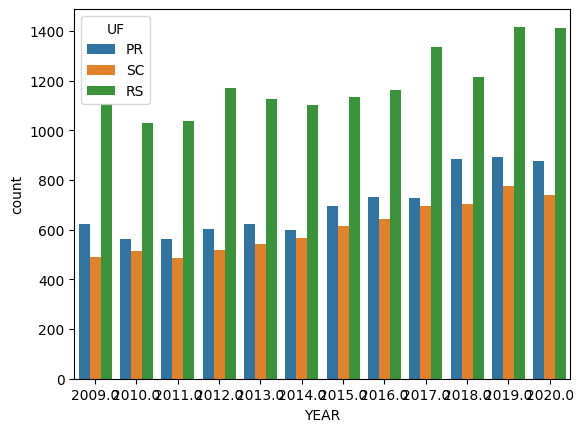

In [ ]:
sns.countplot(data= sul, x= 'YEAR', hue= 'UF');

In [ ]:
# calculando o crescimento dos casos
df1 = sul[sul['YEAR'] == 2009]
df2 = sul[sul['YEAR'] == 2020]

In [ ]:
pr1 = len(df1[df1['UF'] == 'PR'])
pr2 = len(df2[df2['UF'] == 'PR'])
sc1 = len(df1[df1['UF'] == 'SC'])
sc2 = len(df2[df2['UF'] == 'SC'])
rs1 = len(df1[df1['UF'] == 'RS'])
rs2 = len(df2[df2['UF'] == 'RS'])

In [ ]:
cres_pr = ((pr2 - pr1)/pr1)*100
cres_sc = ((sc2 - sc1)/sc1)*100
cres_rs = ((rs2 - rs1)/rs1)*100
print(f'Growth in the number of suicides from 2009 to 2020:\nPR - {cres_pr:.2f}%\nSC - {cres_sc:.2f}%\nRS - {cres_rs:.2f}%')

Growth in the number of suicides from 2009 to 2020:
PR - 41.00%
SC - 51.43%
RS - 27.67%


In [ ]:
sul.describe()

,IDADE,SEXO,RACACOR,ESTCIV,ESC,CODMUNRES,LOCOCOR,MONTH,DAY,YEAR,WEEKEND,Idade
count,29908.000000,29908.000000,29908.000000,29908.000000,29908.000000,29908.000000,29908.000000,29908.000000,29908.000000,29908.000000,29908.000000,29908.000000
mean,45.369299,1.206299,1.279624,1.760165,2.485389,423129.195700,3.124582,6.373412,17.111776,2014.935770,0.291929,3.086131
std,17.759390,0.404655,0.859208,1.179237,1.656480,8498.294952,1.097388,3.531248,7.975661,3.476991,0.454657,1.801016
min,10.000000,1.000000,0.000000,0.000000,0.000000,410000.000000,1.000000,1.000000,1.000000,2009.000000,0.000000,0.000000
25%,31.000000,1.000000,1.000000,1.000000,1.000000,412550.000000,3.000000,3.000000,10.000000,2012.000000,0.000000,2.000000
50%,45.000000,1.000000,1.000000,1.000000,3.000000,421720.000000,3.000000,6.000000,17.000000,2015.000000,0.000000,3.000000
75%,58.000000,1.000000,1.000000,2.000000,4.000000,431340.000000,3.000000,9.000000,24.000000,2018.000000,1.000000,4.000000
max,103.000000,2.000000,5.000000,5.000000,5.000000,432380.000000,9.000000,12.000000,31.000000,2020.000000,1.000000,8.000000


Next we checked the differences in sex.
Men died approximately 3.8 fold more than women, idependent of the age analyzed. Here the ages are in decades, starting from 10 years to 90+

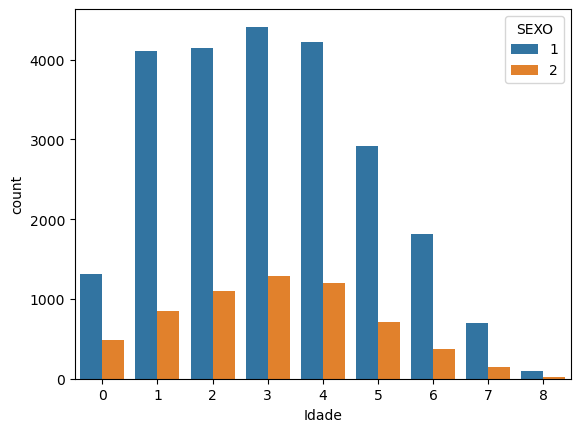

In [ ]:
sns.countplot(data= sul, x= 'Idade', hue= 'SEXO');

In [ ]:
print(len(sul[sul['SEXO'] == 1]))
print(len(sul[sul['SEXO'] == 2]))
print(len(sul[sul['SEXO'] == 1]) / len(sul[sul['SEXO'] == 2]))

23738
6170
3.847325769854133


The race of the suicide completers was predominantly white and completers were mostly either married or single. Most people died at home.

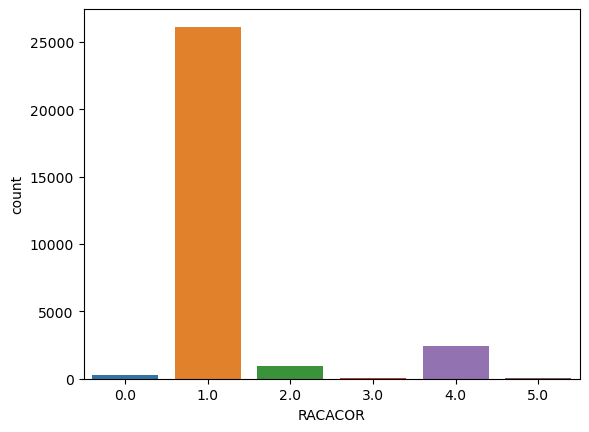

In [ ]:
sns.countplot(data= sul, x= 'RACACOR');

In [ ]:
print(len(sul[sul['RACACOR'] == 4]))
print(len(sul[sul['RACACOR'] == 4]) / len(sul) * 100)

2417
8.081449779323258


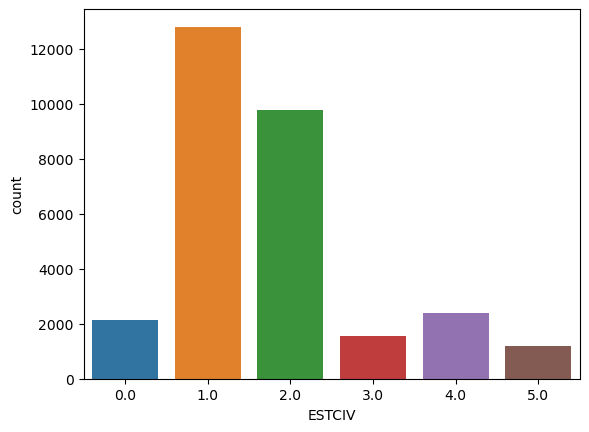

In [ ]:
sns.countplot(data= sul, x= 'ESTCIV');

In [ ]:
print(len(sul[sul['ESTCIV'] == 1]) / len(sul) * 100)
print(len(sul[sul['ESTCIV'] == 2]) / len(sul) * 100)

42.84806740671392
32.74374749230975


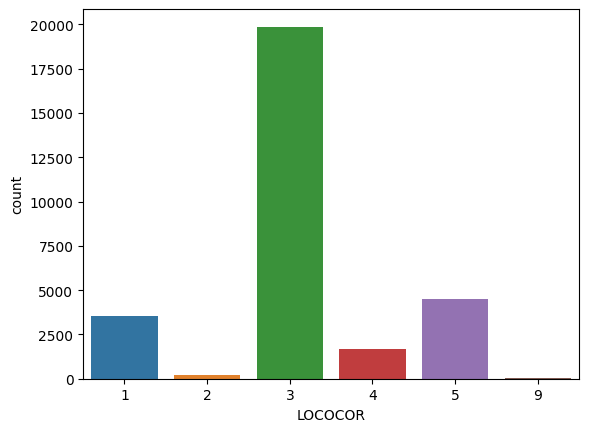

In [ ]:
sns.countplot(data= sul, x= 'LOCOCOR');

In [ ]:
print(len(sul[sul['LOCOCOR'] == 1]) / len(sul) * 100)
print(len(sul[sul['LOCOCOR'] == 3]) / len(sul) * 100)

11.883108198475325
66.45044804065802


The mean age of completers was 45 (± 17) years old.
The schooling years were mostly 4 to 7 (26%) and 8 to 11 (24%) years, equivalent to middle and high school. Unfortunately, data for many completers was unavailable (24%), seen as the 0 column.

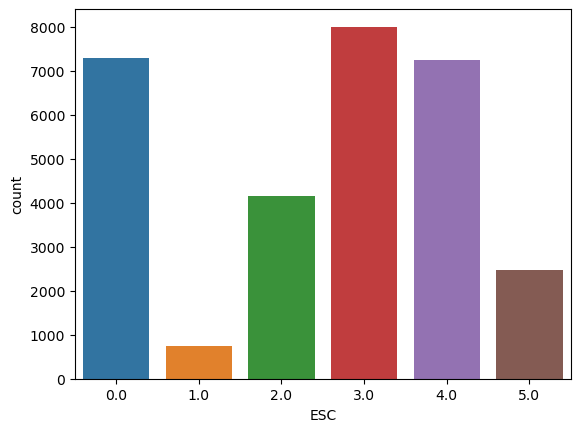

In [ ]:
sns.countplot(data= sul, x= 'ESC');

In [ ]:
print(len(sul[sul['ESC'] == 0]) / len(sul) * 100)
print(len(sul[sul['ESC'] == 3]) / len(sul) * 100)
print(len(sul[sul['ESC'] == 4]) / len(sul) * 100)

24.418215861976726
26.75872676207035
24.20422629396817


People commited suicide roughly the same amount throughout the different seasons and days of the week.

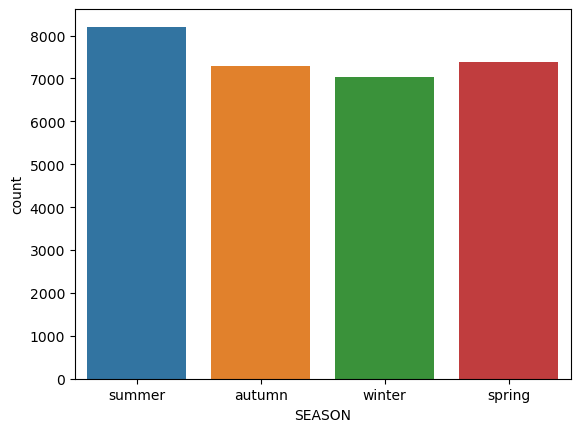

In [ ]:
sns.countplot(data= sul, x= 'SEASON');

In [ ]:
print(len(sul[sul['SEASON'] == 'summer']) / len(sul) * 100)
print(len(sul[sul['SEASON'] == 'autumn']) / len(sul) * 100)
print(len(sul[sul['SEASON'] == 'winter']) / len(sul) * 100)
print(len(sul[sul['SEASON'] == 'spring']) / len(sul) * 100)

27.4374749230975
24.398154339975925
23.515447371940617
24.648923364985954


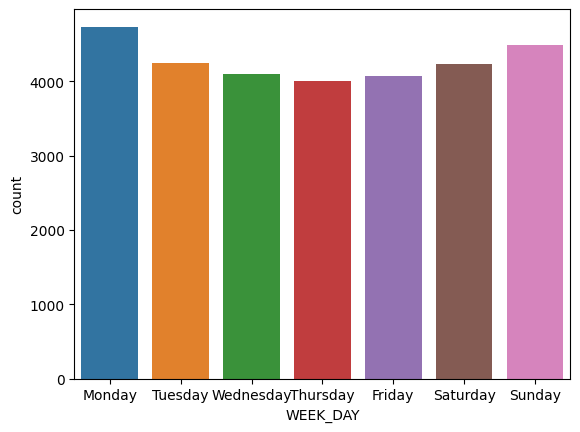

In [ ]:
sns.countplot(data= sul, x= 'WEEK_DAY', order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);

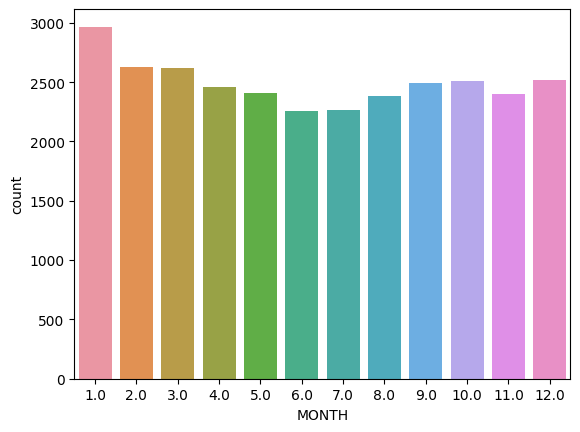

In [ ]:
sns.countplot(data= sul, x= 'MONTH');

## SINAN

For this analysis we used the whole dataset, from 2009 to 2021, that were the available data. The dataset is good to understand the profile of individuals that attempt suicide throughout the years.

In [86]:
sul = pd.read_csv('SUL_2021.csv')
sul

,TP_NOT,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_UNIDADE,DT_OCOR,DT_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,ID_MN_RESI,SIT_CONJUG,DEF_TRANS,DEF_FISICA,DEF_MENTAL,DEF_VISUAL,DEF_AUDITI,TRAN_MENT,TRAN_COMP,DEF_OUT,ID_MN_OCOR,LOCAL_OCOR,OUT_VEZES,LES_AUTOP,VIOL_OUTR,VIOL_ESPEC,AG_FORCA,AG_ENFOR,AG_OBJETO,AG_CORTE,AG_QUENTE,AG_ENVEN,AG_FOGO,AG_AMEACA,AG_OUTROS,AG_ESPEC,NUM_ENVOLV,AUTOR_ALCO,ORIENT_SEX,VIOL_MOTIV,REDE_SAU,IDADE,MONTH,DAY,YEAR,WEEK_DAY,SEASON,WEEKEND
0,2,2009-05-24,NaN,2009.0,41,410420,13854.0,2009-05-24,1992-08-20,4016.0,F,5,1.0,4.0,410420.0,9.0,9.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,410420.0,1.0,9.0,1,1.0,TENT.SUICIDIO,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,,9.0,9.0,NaN,NaN,NaN,16.0,5,24,2009,Sunday,autumn,1
1,2,2009-12-10,NaN,2009.0,41,412770,2809532.0,2009-12-10,1989-03-07,4020.0,M,6,1.0,6.0,412770.0,1.0,2.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,412770.0,1.0,2.0,1,1.0,TENTATIVA DE SUICIDIO,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,,1.0,2.0,NaN,NaN,NaN,20.0,12,10,2009,Thursday,spring,0
2,2,2009-12-10,NaN,2009.0,41,412770,4056752.0,2009-12-10,1975-11-30,4034.0,F,5,1.0,6.0,412770.0,2.0,2.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,412770.0,1.0,9.0,1,1.0,TENTATIVA DE SUICIDIO,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,MEDICAMENTOSA,1.0,2.0,NaN,NaN,NaN,34.0,12,10,2009,Thursday,spring,0
3,2,2009-12-10,NaN,2009.0,41,412770,4056752.0,2009-12-10,1943-09-19,4066.0,M,6,1.0,4.0,412770.0,2.0,2.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,412770.0,1.0,2.0,1,1.0,TENTATIVA DE SUICIDIO,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,,1.0,2.0,NaN,NaN,NaN,66.0,12,10,2009,Thursday,spring,0
4,2,2009-12-30,NaN,2009.0,41,412770,4056752.0,2009-12-30,1979-03-12,4030.0,F,5,1.0,4.0,412770.0,2.0,2.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,412770.0,1.0,2.0,1,1.0,TENTATIVA DE SUICIDIO,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,,1.0,2.0,NaN,NaN,NaN,30.0,12,30,2009,Wednesday,summer,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87846,2,2021-08-17,202133.0,2021.0,43,430390,2230461.0,2021-08-01,NaN,4020.0,F,5,1.0,9.0,430390.0,1.0,2.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,430390.0,1.0,1.0,1,1.0,TS,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,,1.0,9.0,1.0,9.0,1.0,20.0,8,17,2021,Tuesday,winter,0
87847,2,2021-08-17,202133.0,2021.0,43,431446,2240572.0,2021-08-12,2000-07-26,4021.0,F,5,1.0,6.0,431446.0,2.0,2.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,431446.0,1.0,1.0,1,1.0,TENTATIVA DE SUICIDIO,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,,1.0,2.0,1.0,6.0,1.0,21.0,8,17,2021,Tuesday,winter,0
87848,2,2021-08-18,202133.0,2021.0,43,431560,2232995.0,2021-08-17,1998-09-23,4022.0,M,6,9.0,9.0,431560.0,9.0,9.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,431560.0,1.0,9.0,1,1.0,TENTATIVA DE SUICIDIO,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0,TS,9.0,9.0,9.0,9.0,9.0,22.0,8,18,2021,Wednesday,winter,0
87849,2,2021-08-18,202133.0,2021.0,43,431560,2232995.0,2021-08-16,1991-09-29,4029.0,F,5,9.0,9.0,431560.0,9.0,9.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,431850.0,99.0,9.0,1,1.0,TS,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0,INTOXICACAO,9.0,9.0,9.0,9.0,1.0,29.0,8,18,2021,Wednesday,winter,0


In [87]:
sul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87851 entries, 0 to 87850
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TP_NOT      87851 non-null  int64  
 1   DT_NOTIFIC  87851 non-null  object 
 2   SEM_NOT     81611 non-null  float64
 3   NU_ANO      87851 non-null  float64
 4   SG_UF_NOT   87851 non-null  int64  
 5   ID_MUNICIP  87851 non-null  int64  
 6   ID_UNIDADE  87823 non-null  float64
 7   DT_OCOR     87850 non-null  object 
 8   DT_NASC     87031 non-null  object 
 9   NU_IDADE_N  87851 non-null  float64
 10  CS_SEXO     87851 non-null  object 
 11  CS_GESTANT  87851 non-null  int64  
 12  CS_RACA     87698 non-null  float64
 13  CS_ESCOL_N  84041 non-null  float64
 14  ID_MN_RESI  87841 non-null  float64
 15  SIT_CONJUG  86998 non-null  float64
 16  DEF_TRANS   87672 non-null  float64
 17  DEF_FISICA  87438 non-null  float64
 18  DEF_MENTAL  87485 non-null  float64
 19  DEF_VISUAL  87469 non-nul

In [88]:
sul.describe()

,TP_NOT,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_UNIDADE,NU_IDADE_N,CS_GESTANT,CS_RACA,CS_ESCOL_N,ID_MN_RESI,SIT_CONJUG,DEF_TRANS,DEF_FISICA,DEF_MENTAL,DEF_VISUAL,DEF_AUDITI,TRAN_MENT,TRAN_COMP,DEF_OUT,ID_MN_OCOR,LOCAL_OCOR,OUT_VEZES,LES_AUTOP,VIOL_OUTR,AG_FORCA,AG_ENFOR,AG_OBJETO,AG_CORTE,AG_QUENTE,AG_ENVEN,AG_FOGO,AG_AMEACA,AG_OUTROS,NUM_ENVOLV,AUTOR_ALCO,ORIENT_SEX,VIOL_MOTIV,REDE_SAU,IDADE,MONTH,DAY,YEAR,WEEKEND
count,87851.0,81611.000000,87851.000000,87851.000000,87851.000000,8.782300e+04,87851.000000,87851.000000,87698.000000,84041.000000,87841.000000,86998.000000,87672.000000,87438.000000,87485.000000,87469.000000,87433.000000,87559.000000,87510.000000,87356.000000,87522.000000,87812.000000,87668.000000,87851.0,87851.0,87449.000000,87497.000000,87420.000000,87472.000000,87466.000000,87623.000000,87455.000000,87443.000000,87212.000000,87281.000000,87468.000000,79544.000000,79544.000000,79495.000000,87851.000000,87851.000000,87851.000000,87851.000000,87851.000000
mean,2.0,201846.731433,2017.971418,42.018270,421288.200795,3.611039e+06,4030.999966,5.573460,1.646583,5.687986,421213.200544,2.640302,2.594477,5.810117,5.803269,5.812939,5.815516,5.593143,5.704491,5.809309,421253.075798,3.888603,2.918408,1.0,1.0,2.017965,1.944992,2.019984,1.926102,2.021037,1.334364,2.018718,2.018275,1.858747,1.047891,3.414757,3.434389,48.316328,1.293981,30.999966,6.484684,15.812023,2017.971418,0.191153
std,0.0,2109.786447,2.404656,0.865987,8745.593561,2.240454e+06,14.203965,1.091712,1.664090,2.456292,9388.324587,2.677811,2.598481,2.895250,2.911563,2.892894,2.891285,3.211501,3.070038,2.933521,8875.991741,15.371933,2.960070,0.0,0.0,0.409955,0.502306,0.432630,0.530083,0.435666,0.632140,0.426611,0.392818,0.623752,0.594620,2.997523,3.579713,42.828322,1.051207,14.203965,3.495202,8.791119,2.404656,0.393212
min,2.0,1602.000000,2009.000000,41.000000,410030.000000,3.000000e+02,4010.000000,1.000000,1.000000,0.000000,120040.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,150080.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,2009.000000,0.000000
25%,2.0,201745.000000,2017.000000,41.000000,411520.000000,2.252244e+06,4019.000000,5.000000,1.000000,4.000000,411520.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,411520.000000,1.000000,1.000000,1.0,1.0,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,9.000000,1.000000,19.000000,3.000000,8.000000,2017.000000,0.000000
50%,2.0,201913.000000,2019.000000,42.000000,420820.000000,2.639548e+06,4028.000000,5.000000,1.000000,6.000000,420820.000000,2.000000,2.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,420820.000000,1.000000,2.000000,1.0,1.0,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,9.000000,1.000000,28.000000,7.000000,16.000000,2019.000000,0.000000
75%,2.0,202013.000000,2020.000000,43.000000,431180.000000,5.323436e+06,4040.000000,6.000000,1.000000,9.000000,431020.000000,2.000000,2.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,431020.000000,1.000000,2.000000,1.0,1.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,8.000000,99.000000,1.000000,40.000000,10.000000,23.000000,2020.000000,0.000000
max,2.0,202138.000000,2021.000000,43.000000,432380.000000,9.995919e+06,4102.000000,9.000000,9.000000,10.000000,530010.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,510760.000000,99.000000,9.000000,1.0,1.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,99.000000,9.000000,102.000000,12.000000,31.000000,2021.000000,1.000000


### Distrubution by state

The states of PR and RS have similar distribution, hihger than SC, but this distribution follows the estimated populations of the states.
PR - 11.5, SC - 7.2 e RS 11.4 milion inhabitants.

In [89]:
# creating the column with the state name to facilitate the visualization

condition = [(sul['SG_UF_NOT'] == 41), (sul['SG_UF_NOT'] == 42), (sul['SG_UF_NOT'] == 43)]
uf = ['PR', 'SC', 'RS']

sul['UF'] = np.select(condition, uf)

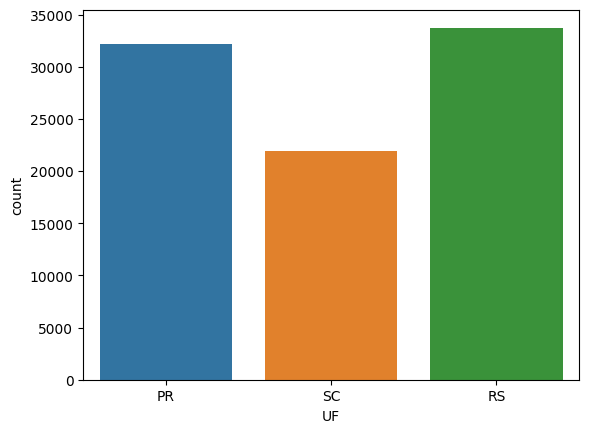

In [90]:
sns.countplot(data= sul, x='UF');

In [91]:
rs = len(sul[sul['UF'] == 'RS'])
pr = len(sul[sul['UF'] == 'PR'])
sc = len(sul[sul['UF'] == 'SC'])

PR = 11500000
SC = 7200000
RS = 11400000

txpr = PR/pr
txsc = SC/sc
txrs = RS/rs

print(txpr, txsc, txrs, pr, sc, rs)

357.66491462693995 328.16773017319963 337.6977309082292 32153 21940 33758


In [92]:
anospr = pr/11
anossc = sc/11
anosrs = rs/11
taxapr = anospr/PR*100000
taxasc = anossc/SC*100000
taxars = anosrs/RS*100000

dict = {'UF':['PR', 'SC', 'RS'], 'Rate':[taxapr, taxasc, taxars]}
uf = pd.DataFrame(dict)
uf

,UF,Rate
0,PR,25.417391
1,SC,27.702020
2,RS,26.920255


We also used data from 2017 to 2020 to get a more accurate rate, since until 2014 it was not mandatory to report suicide attempts, and according to the stablished law, the reporting could be gradual.
We can see the growing in reporting throughout the years, specially in the first ones. 2021 data is not complete.

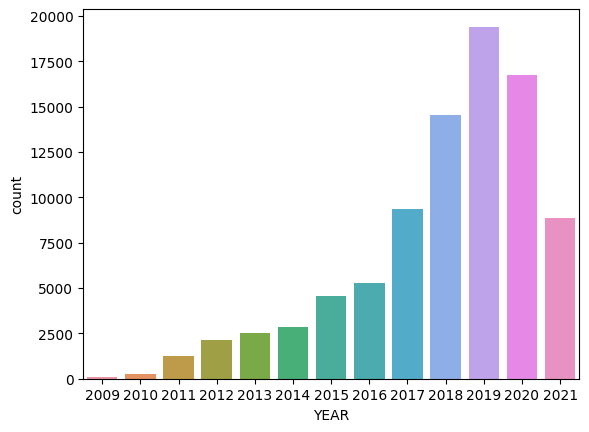

In [93]:
sns.countplot(data= sul, x= 'YEAR');

In [94]:
rate = sul[sul['YEAR'] > 2016]

In [95]:
rs = len(rate[rate['UF'] == 'RS'])
pr = len(rate[rate['UF'] == 'PR'])
sc = len(rate[rate['UF'] == 'SC'])

PR = 11500000
SC = 7200000
RS = 11400000

txpr = PR/pr
txsc = SC/sc
txrs = RS/rs

print(txpr, txsc, txrs, pr, sc, rs)

449.9393559998435 433.47381095725467 425.8975604288863 25559 16610 26767


This represent a more accurate measure, however, as the Secretariat of Health mentions, probably only one third of the suicide attempts in Brazil are reported.

It is interestingly to observe that attempt rates are similar between the three states, even though deaths rates differ.

In [96]:
anospr = pr/4.75
anossc = sc/4.75
anosrs = rs/4.75
taxapr = anospr/PR*100000
taxasc = anossc/SC*100000
taxars = anosrs/RS*100000

dict = {'UF':['PR', 'SC', 'RS'], 'Rate':[taxapr, taxasc, taxars]}
uf = pd.DataFrame(dict)
uf

,UF,Rate
0,PR,46.789931
1,SC,48.567251
2,RS,49.431210


### Sex/gender

Almost 70% of the attempts were done by females, a complete opposite of the deaths, similar in the states.

Almost no women were pregnant, and most people who reported the sexual orientation were heterossexual, however, there were many ignored answers or missing values.


In [97]:
sul.loc[sul['CS_SEXO'] == 'I']

,TP_NOT,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_UNIDADE,DT_OCOR,DT_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,ID_MN_RESI,SIT_CONJUG,DEF_TRANS,DEF_FISICA,DEF_MENTAL,DEF_VISUAL,DEF_AUDITI,TRAN_MENT,TRAN_COMP,DEF_OUT,ID_MN_OCOR,LOCAL_OCOR,OUT_VEZES,LES_AUTOP,VIOL_OUTR,VIOL_ESPEC,AG_FORCA,AG_ENFOR,AG_OBJETO,AG_CORTE,AG_QUENTE,AG_ENVEN,AG_FOGO,AG_AMEACA,AG_OUTROS,AG_ESPEC,NUM_ENVOLV,AUTOR_ALCO,ORIENT_SEX,VIOL_MOTIV,REDE_SAU,IDADE,MONTH,DAY,YEAR,WEEK_DAY,SEASON,WEEKEND,UF
87473,2,2021-07-16,202128.0,2021.0,43,431880,2233312.0,2021-03-01,1975-12-08,4045.0,I,9,9.0,9.0,431880.0,9.0,9.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,431880.0,1.0,9.0,1,1.0,TENTATIVA SUICIDIO,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,,1.0,2.0,9.0,99.0,1.0,45.0,7,16,2021,Friday,winter,0,RS


In [98]:
sul = sul.drop(87473, axis= 0)

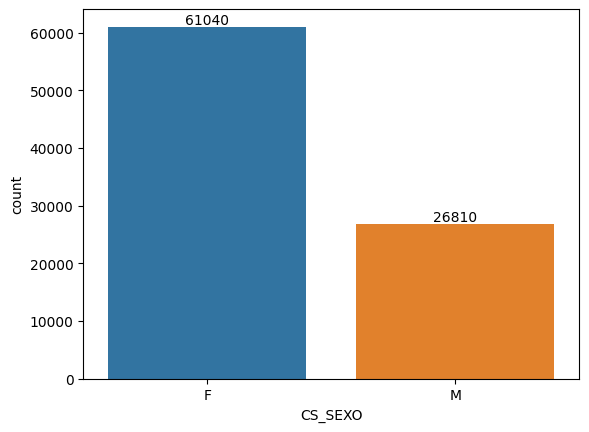

In [99]:
ax = sns.countplot(x= 'CS_SEXO', data= sul)
ax.bar_label(ax.containers[0]);

In [100]:
f = len(sul[sul['CS_SEXO'] == 'F'])
m = len(sul[sul['CS_SEXO'] == 'M'])
tot = f + m
tf = f/tot*100
tm = m/tot*100

print(f'Percentage of attempts: females {tf:.2f}%, males {tm:.2f}%. \nRatio {tf/tm:.2f} fold more in females')

Percentage of attempts: females 69.48%, males 30.52%. 
Ratio 2.28 fold more in females


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


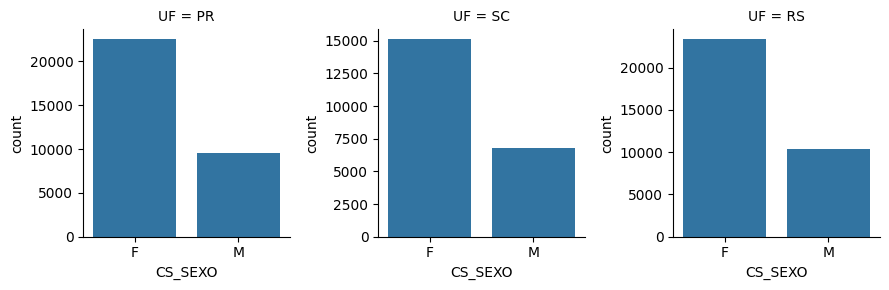

In [101]:
sexo = sns.FacetGrid(sul, col= 'UF', sharey= False)
sexo.map(sns.countplot, 'CS_SEXO');

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


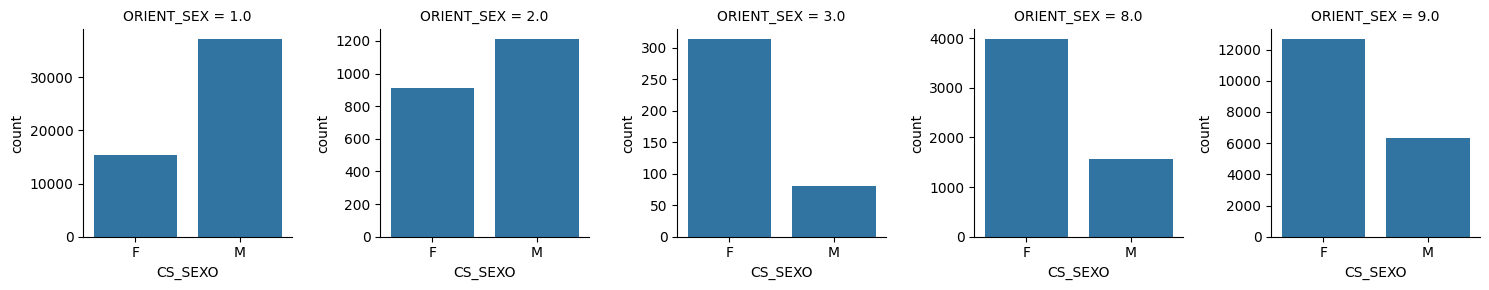

In [102]:
ori = sns.FacetGrid(sul, col= 'ORIENT_SEX', sharey= False)
ori.map(sns.countplot, 'CS_SEXO');

### Age and race

The mean age is 30 years, with a decrease tendency with more age, as observed within the decades. However these are absolute measures.

Race/color in attempts is predominantly White. Indigenous have low difference between males and females attempts, whereas others have a female prevalence.

In [103]:
l = len(sul[sul['IDADE'].between(10, 20, inclusive='left')])
a = len(sul[sul['IDADE'].between(20, 30, inclusive='left')])
s = len(sul[sul['IDADE'].between(30, 40, inclusive='left')])
d = len(sul[sul['IDADE'].between(40, 50, inclusive='left')])
f = len(sul[sul['IDADE'].between(50, 60, inclusive='left')])
g = len(sul[sul['IDADE'].between(60, 70, inclusive='left')])
h = len(sul[sul['IDADE'].between(70, 80, inclusive='left')])
j = len(sul[sul['IDADE'].between(80, 90, inclusive='left')])
k = len(sul[sul['IDADE'].between(60, 97)])

tot = l+a+s+d+f+g+h+j+k
p = l/tot*100
q = a/tot*100
w = s/tot*100
e = d/tot*100
r = f/tot*100
t = g/tot*100
y = h/tot*100
u = j/tot*100
i = k/tot*100
print(f'Absolute percentage according to the decade: 10-20 - {p:.2f}%,\n20-30 - {q:.2f}%, \n30-40 - {w:.2f}%, \n40-50 - {e:.2f}%, \n50-60 - {r:.2f}%, \n60 or more - {t+y+u+i:.2f}%')

Absolute percentage according to the decade: 10-20 - 25.10%,
20-30 - 26.55%, 
30-40 - 19.06%, 
40-50 - 14.22%, 
50-60 - 7.70%, 
60 or more - 7.36%


In [104]:
sul['AGE'] = pd.cut(sul['IDADE'], bins=[10, 19, 29, 39, 49, 59, 69, 79, 89, 109], labels=False)

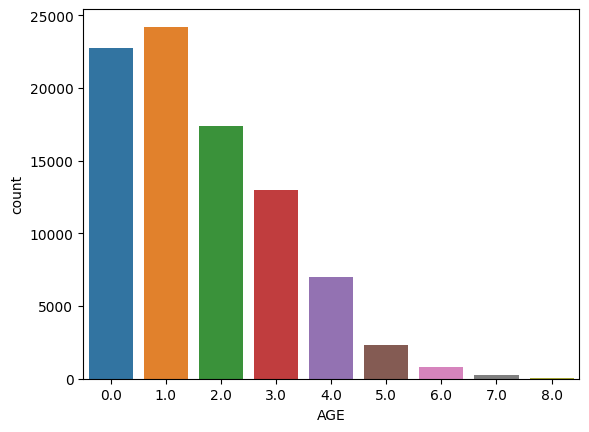

In [105]:
sns.countplot(x= 'AGE', data = sul);

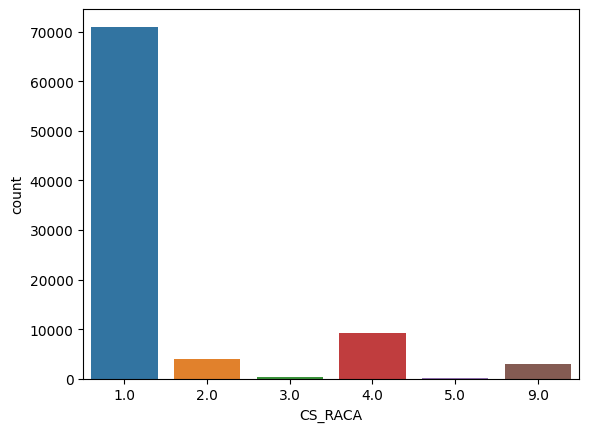

In [106]:
sns.countplot(x= 'CS_RACA', data = sul);

In [107]:
br = len(sul[sul['CS_RACA'] == 1])
pt = len(sul[sul['CS_RACA'] == 2])
am = len(sul[sul['CS_RACA'] == 3])
pa = len(sul[sul['CS_RACA'] == 4])
ind = len(sul[sul['CS_RACA'] == 5])
ig = len(sul[sul['CS_RACA'] == 9])
tot = br+pt+pa+am+ind+ig
print(f'Absolute percentage of race/color attempters: White {br*100/tot:.2f}%, \nBlack {pt*100/tot:.2f}%, \nAsian/Yellow {am*100/tot:.2f}%, \nBrown {pa*100/tot:.2f}%, \nRed/Indigenous {ind*100/tot:.2f}%, \nIgnored{ig*100/tot:.2f}%')

Absolute percentage of race/color attempters: White 80.95%, 
Black 4.47%, 
Asian/Yellow 0.49%, 
Brown 10.56%, 
Red/Indigenous 0.19%, 
Ignored3.35%


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


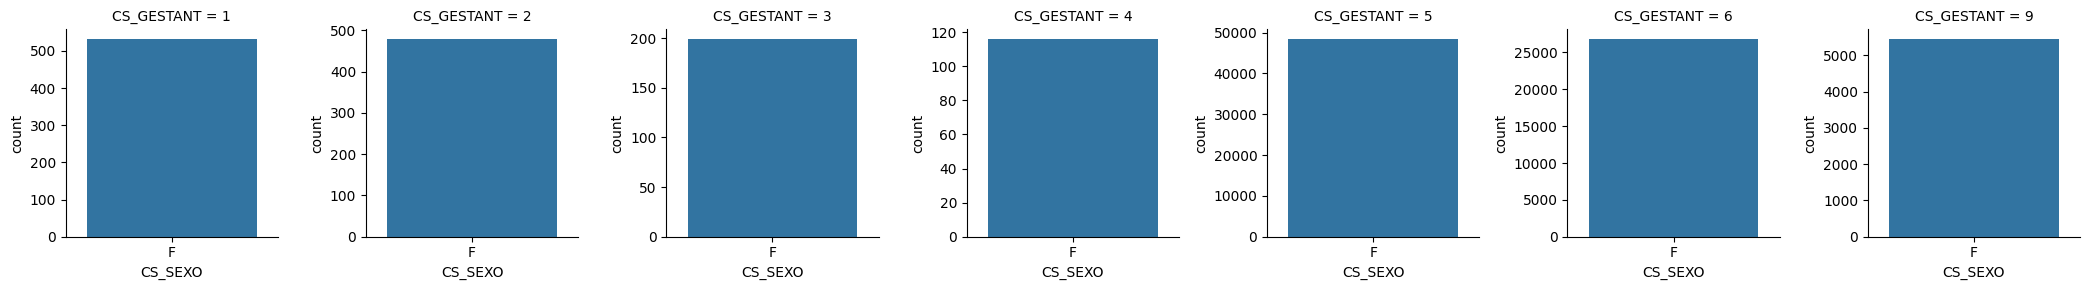

In [108]:
# 1= 1° trimester, 2= 2° trimester, 3= 3° trimester, 4= ignored pregnancy time, 5= no pregnancy, 6= not applicable, 9= ignored
grav = sns.FacetGrid(sul, col= 'CS_GESTANT', sharey= False)
grav.map(sns.countplot, 'CS_SEXO');

### Schooling

**1= incomplete elementary, 2= complete elementary, 3= incomplete middle, 4= complete middle, 5= incomplete high, 6= complete high school, 7= incomplete higher, 8= complete higher education, 9= ignored, 10= not applicable**

Almost 1/4 of the data was missing. Similar to deaths, attempts happen more in the intermediate schooling. This is true for both sex and different states.

Souther Brazil has the lowest rate of iliteracy (3.3%) in people older than 15 years old.

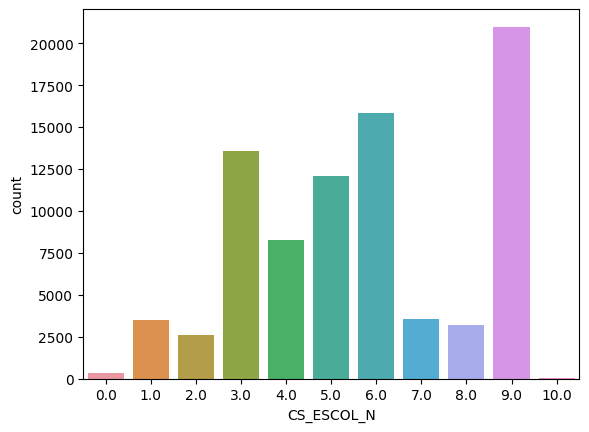

In [109]:
sns.countplot(data= sul, x='CS_ESCOL_N');

In [110]:
# Grouping complete and incomplete schooling
a = len(sul[sul['CS_ESCOL_N'] < 3])
s = len(sul[sul['CS_ESCOL_N'] == 3])
d = len(sul[sul['CS_ESCOL_N'] == 4])
f = len(sul[sul['CS_ESCOL_N'] == 5])
g = len(sul[sul['CS_ESCOL_N'] == 6])
h = len(sul[sul['CS_ESCOL_N'] == 7])
j = len(sul[sul['CS_ESCOL_N'] == 8])
k = len(sul[sul['CS_ESCOL_N'] > 8])
tot = a+s+d+f+g+h+j+k
pri = a/tot*100
fun = (s+d)/tot*100
med = (f+g)/tot*100
sup = (h+j)/tot*100
ign = k/tot*100
print(f'Absolute percentage of shooling in attempters: Elementary {pri:.2f}%, \nMiddle school {fun:.2f}%, \nHigh school {med:.2f}%, \nHigher education {sup:.2f}%, \nIgnored {ign:.2f}%')

Absolute percentage of shooling in attempters: Elementary 7.67%, 
Middle school 26.02%, 
High school 33.22%, 
Higher education 8.06%, 
Ignored 25.03%


In [111]:
sul['CS_ESCOL_N'] = sul['CS_ESCOL_N'].replace([9,10], 0)
sul['CS_ESCOL_N'] = sul['CS_ESCOL_N'].fillna(0)  # missing/ignored/not applicable values = 0

sul['CS_ESCOL_N'] = sul['CS_ESCOL_N'].replace(2, 1)  # elementary
sul['CS_ESCOL_N'] = sul['CS_ESCOL_N'].replace([3,4], 2)  # middle school
sul['CS_ESCOL_N'] = sul['CS_ESCOL_N'].replace([5,6], 3)  # high school
sul['CS_ESCOL_N'] = sul['CS_ESCOL_N'].replace([7,8], 4)  # higher education

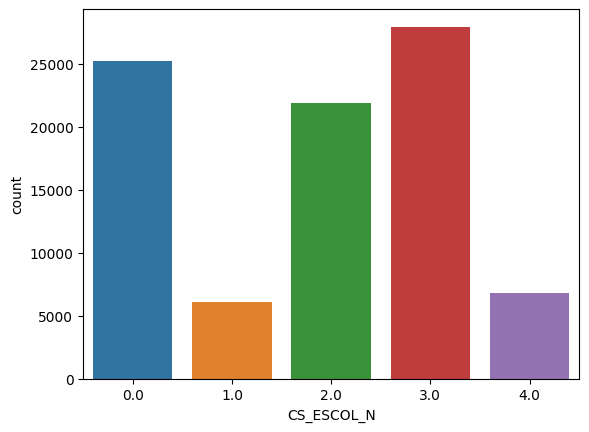

In [112]:
sns.countplot(data= sul, x= 'CS_ESCOL_N');

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


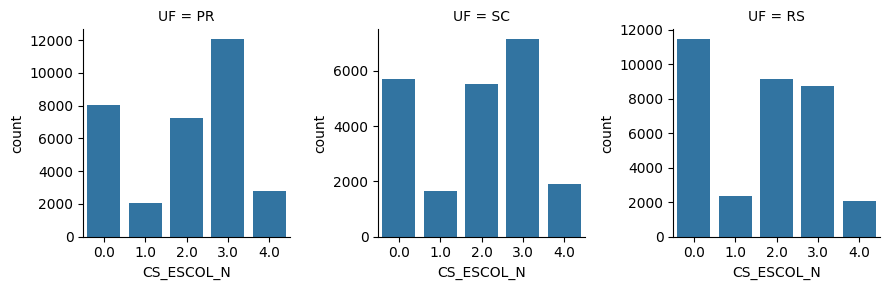

In [113]:
esco = sns.FacetGrid(sul, col= 'UF', sharey= False)
esco.map(sns.countplot, 'CS_ESCOL_N');

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


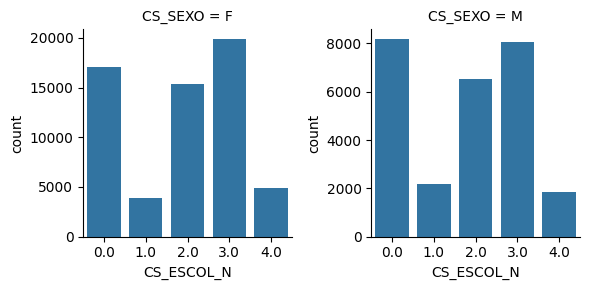

In [114]:
esco = sns.FacetGrid(sul, col= 'CS_SEXO', sharey= False)
esco.map(sns.countplot, 'CS_ESCOL_N');  # there is one person with ignored sex

### Marital status and Location of attempt

**1= single, 2= married/stable union, 3= widow, 4= divorced, 8= not applicable, 9= ignored**

Simgles and married made most attempts. The pattern if similar in men and women.

**1= own house, 2= multi cohabitation, 3= school, 4= sport location, 5= bar or similar, 6= public street/road, 7= commercial stablishment, 8= industry/construction site, 9= other, 99= ignored**

The majority of attempts happend at home. Besides, almost 35% were recurrent and 40% were first attempt.

In [115]:
sul['SIT_CONJUG'] = sul['SIT_CONJUG'].replace([8,9], 0)
sul['SIT_CONJUG'] = sul['SIT_CONJUG'].replace(4, 3)  # grouping divorced and widows
sul['SIT_CONJUG'] = sul['SIT_CONJUG'].fillna(0)  # missing/ignored values = 0

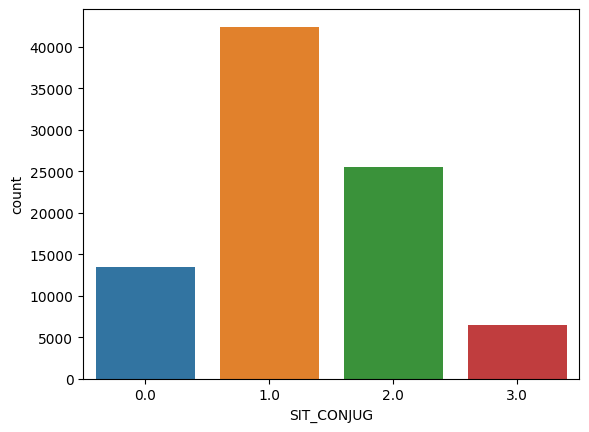

In [116]:
sns.countplot(data= sul, x='SIT_CONJUG');

In [117]:
s = len(sul[sul['SIT_CONJUG'] == 1])
c = len(sul[sul['SIT_CONJUG'] == 2])
d = len(sul[sul['SIT_CONJUG'] == 3])
i = len(sul[sul['SIT_CONJUG'] == 0])
tot = len(sul)
print(f'Absolute percentages: single {s*100/tot:.2f}%\nmarried {c*100/tot:.2f}%\ndivorced/widow {d*100/tot:.2f}%\nignored {i*100/tot:.2f}%')

Absolute percentages: single 48.28%
married 29.10%
divorced/widow 7.34%
ignored 15.28%


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


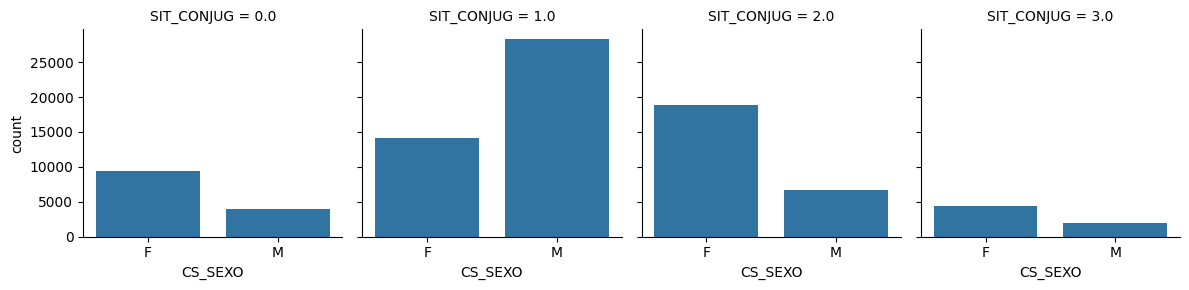

In [118]:
conj = sns.FacetGrid(sul, col= 'SIT_CONJUG')
conj.map(sns.countplot, 'CS_SEXO');

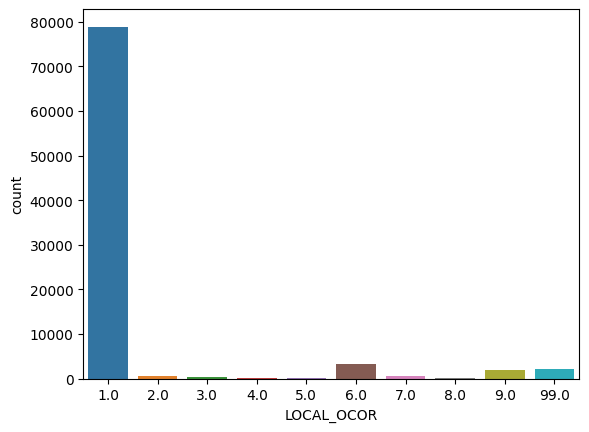

In [119]:
sns.countplot(data= sul, x= 'LOCAL_OCOR');

In [120]:
ca = len(sul[sul['LOCAL_OCOR'] == 1])
vp = len(sul[sul['LOCAL_OCOR'] == 6])
to = len(sul['LOCAL_OCOR'])
print(f'Absolute percentages for location of attempt: home {ca*100/to:.2f}%\npublic street/road {vp*100/to:.2f}%')

Absolute percentages for location of attempt: home 89.76%
public street/road 3.68%


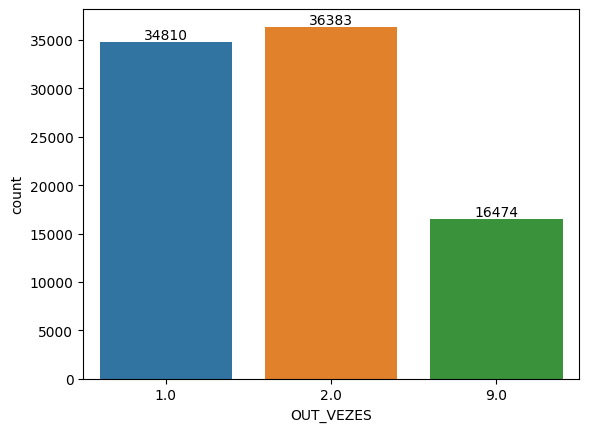

In [121]:
ax = sns.countplot(x= 'OUT_VEZES', data= sul)
ax.bar_label(ax.containers[0]);

In [122]:
e = len(sul[sul['OUT_VEZES'] == 1])
c = len(sul[sul['OUT_VEZES'] == 2])
i = len(sul[sul['OUT_VEZES'] == 9])
to = len(sul)
print(f'Percentage of recurrent attempts: recurrent: {e*100/to:.2f}%\nfirst {c*100/to:.2f}%\nignored {i*100/to:.2f}')

Percentage of recurrent attempts: recurrent: 39.62%
first 41.41%
ignored 18.75


### Means of the attempt

**AG_ENFOR = hanging
AG_OBJETO	= blunt object
AG_CORTE = sharp object
AG_QUENTE	= hot substance or object or fire
AG_ENVEN	= poisoning or intoxication**

Males and females attempt more by intoxication.

Males - intoxication, hanging, sharp object
Females - intoxication, sharp object, hanging

Approximately 18% of males and 8% of females were intoxicated by alcohol during the attempt.

Approximately 36% of the attempters had a disability or disorder, from which 13% were mood disorders and 23% were psychiatric disorders.

In [123]:
# here we considered ignored or missing values as 'no' (= 2)
cols = ['AG_FORCA', 'AG_ENFOR', 'AG_OBJETO', 'AG_CORTE', 'AG_QUENTE', 'AG_ENVEN', 'AG_FOGO', 'AG_AMEACA', 'AG_OUTROS']
sul[cols] = sul[cols].replace([0,9], 2)
sul[cols] = sul[cols].fillna(2)

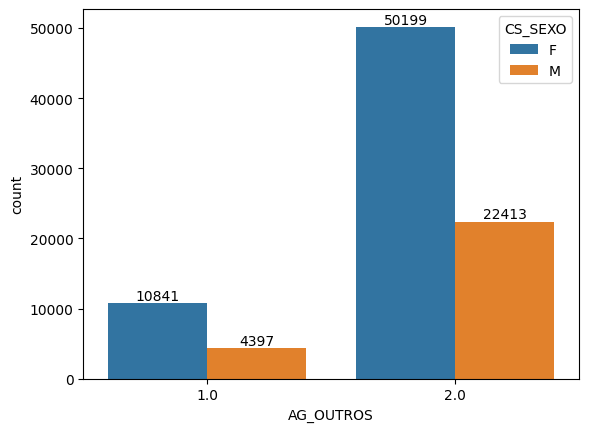

In [124]:
ax = sns.countplot(data= sul, x= "AG_OUTROS", hue= 'CS_SEXO')
ax.bar_label(ax.containers[1]);
ax.bar_label(ax.containers[0]);

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


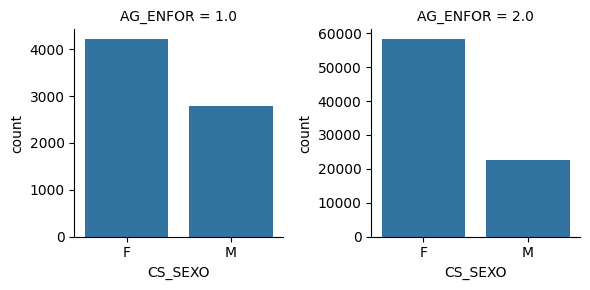

In [125]:
loc = sns.FacetGrid(sul, col= 'AG_ENFOR', sharey= False)
loc.map(sns.countplot, 'CS_SEXO');

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


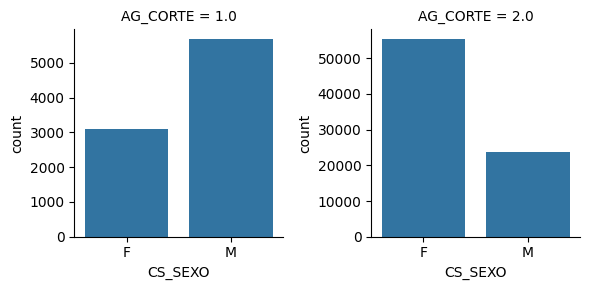

In [126]:
loc = sns.FacetGrid(sul, col= 'AG_CORTE', sharey= False)
loc.map(sns.countplot, 'CS_SEXO');

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


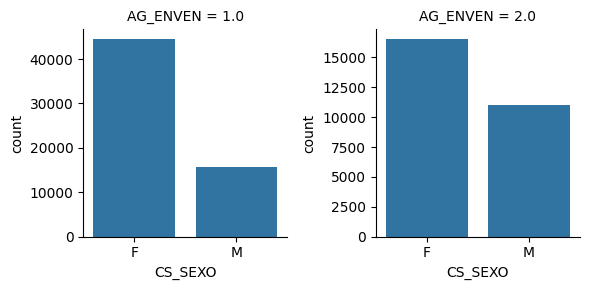

In [127]:
loc = sns.FacetGrid(sul, col= 'AG_ENVEN', sharey= False)
loc.map(sns.countplot, 'CS_SEXO');

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


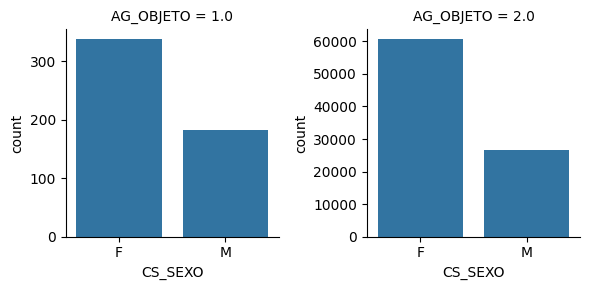

In [128]:
loc = sns.FacetGrid(sul, col= 'AG_OBJETO', sharey= False)
loc.map(sns.countplot, 'CS_SEXO');

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


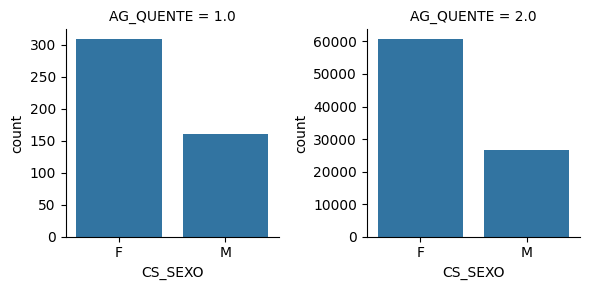

In [129]:
loc = sns.FacetGrid(sul, col= 'AG_QUENTE', sharey= False)
loc.map(sns.countplot, 'CS_SEXO');

In [130]:
e = len(sul[sul['AG_ENFOR'] == 1])
c = len(sul[sul['AG_CORTE'] == 1])
i = len(sul[sul['AG_ENVEN'] == 1])
to = len(sul)
print(f'Percentage of the mean used in the attempt in both sexes: Hanging {e*100/to:.2f}%\nSharp object {c*100/to:.2f}%\nIntoxication {i*100/to:.2f}%')

Percentage of the mean used in the attempt in both sexes: Hanging 7.97%
Sharp object 10.00%
Intoxication 68.60%


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


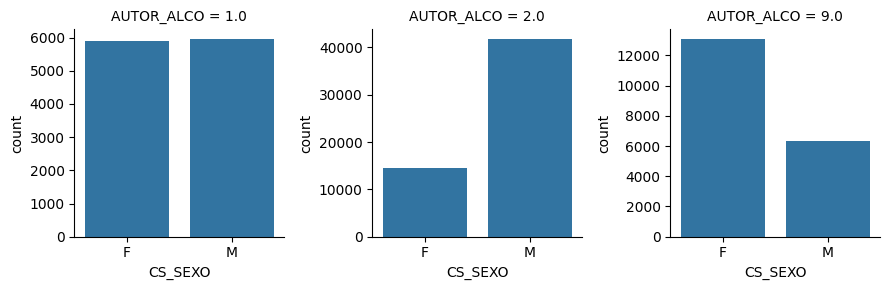

In [131]:
alco = sns.FacetGrid(sul, col= 'AUTOR_ALCO', sharey= False)
alco.map(sns.countplot, 'CS_SEXO');

In [132]:
d = len(sul[sul['DEF_TRANS'] == 1])
c = len(sul[sul['TRAN_COMP'] == 1])
p = len(sul[sul['TRAN_MENT'] == 1])
to = len(sul)
print(f'Percentage of attempters with a disorder/disability {d*100/to:.2f}%\nMood disorder {c*100/to:.2f}%\nPsychiatric disorder {p*100/to:.2f}%')

Percentage of attempters with a disorder/disability 36.73%
Mood disorder 12.64%
Psychiatric disorder 23.27%


### Season/weekday

The attempts happened similarly throughout the seasons and more during the weekdays than on weekend.

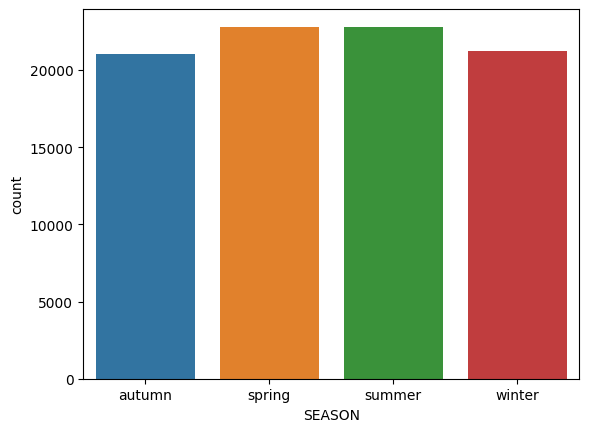

In [133]:
sns.countplot(data= sul, x= 'SEASON');

In [134]:
p = len(sul[sul['SEASON'] == 'spring'])
o = len(sul[sul['SEASON'] == 'autumn'])
i = len(sul[sul['SEASON'] == 'winter'])
v = len(sul[sul['SEASON'] == 'summer'])

tot = len(sul)
tp = p/tot*100
to = o/tot*100
ti = i/tot*100
tv = v/tot*100
tx_rest = (tot-(p+o+i+v))/tot*100
print(f'Percentage of attempts in the seasons: Spring {tp:.2f}%\nAutumn {to:.2f}%\nWinter {ti:.2f}%\nSummer {tv:.2f}%')

Percentage of attempts in the seasons: Spring 25.93%
Autumn 23.92%
Winter 24.19%
Summer 25.96%


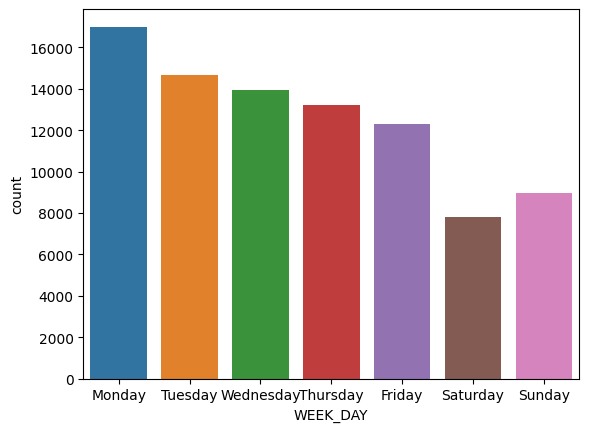

In [135]:
sns.countplot(data= sul, x= 'WEEK_DAY',
             order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]);